In [1]:
import numpy as np
import h5py
from nbodykit.lab import *
import nbodykit 
import matplotlib.pyplot as plt
import scipy.integrate

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

/Users/forero/anaconda3/envs/nbodykit-env/lib/python3.7/site-packages/nbodykit/extern/docrep.py:412: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  s = dedents(s)
/Users/forero/anaconda3/envs/nbodykit-env/lib/python3.7/site-packages/nbodykit/extern/docrep.py:341: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  s = dedents('\n' + '\n'.join(lines[first:]))


In [139]:
5/720

0.006944444444444444

In [155]:
def power_spectrum(filename, L_side=0):
    print(filename)
    f = h5py.File(filename, 'r')
    divergence = f['divergence'][...]
    f.close()

    cosmo = cosmology.Planck15    
    f = cosmo.scale_independent_growth_rate(0.0)
    
    delta = -divergence/(100 * cosmo.h)
        
    delta_mesh = nbodykit.source.mesh.array.ArrayMesh(delta, L_side) 
    r = FFTPower(delta_mesh, mode='1d', dk=0.005, kmin=0.005)
    Pk = r.power

    return {'k': Pk['k'], 'Pk':(Pk['power'].real- Pk.attrs['shotnoise'])}

In [156]:
path = "/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/"
pk = {}
sigmas = [5.0, 10.0, 20.0, 30.0, 40.0]
for sigma in sigmas:
    filename = "mock_AbacusCosmos_720box_planck_00_0_FoF_vmax_200.0_s_{:.1f}_nside_144.hdf5".format(sigma)
    pk["abacus_{:.1f}".format(sigma)] = power_spectrum(path+filename, L_side=720.0)

/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/mock_AbacusCosmos_720box_planck_00_0_FoF_vmax_200.0_s_5.0_nside_144.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/mock_AbacusCosmos_720box_planck_00_0_FoF_vmax_200.0_s_10.0_nside_144.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/mock_AbacusCosmos_720box_planck_00_0_FoF_vmax_200.0_s_20.0_nside_144.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/mock_AbacusCosmos_720box_planck_00_0_FoF_vmax_200.0_s_30.0_nside_144.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/mock_AbacusCosmos_720box_planck_00_0_FoF_vmax_200.0_s_40.0_nside_144.hdf5


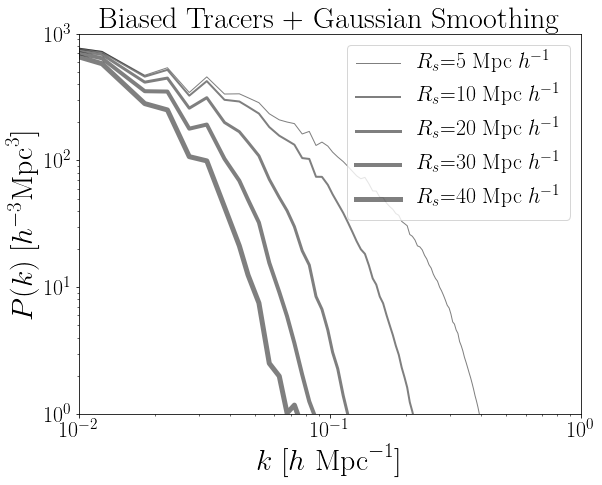

In [157]:
plt.figure(figsize=(9,7))

sigmas = [5.0, 10.0, 20.0, 30.0, 40.0]
for i, sigma in enumerate(sigmas):
    plt.loglog(pk['abacus_{:.1f}'.format(sigma)]['k'], 
               pk['abacus_{:.1f}'.format(sigma)]['Pk'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(sigma),
               linewidth=i+1, color='black', alpha=0.5)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1E-2, 1)
plt.ylim(1E0,1E3)
plt.title("Biased Tracers + Gaussian Smoothing")
plt.savefig("plot_power_spectrum_tracers_rs.pdf", bbox_inches='tight')

In [158]:
path = "/Users/forero/github/WatershedAbacus/nb/"
sigmas = [2.0, 6.0, 10.0, 14.0, 20.0]
for sigma in sigmas:
    filename = "mock_divergence_mesh_360_box_720_slim_{}.h5".format(int(sigma))
    pk["gauss_{:.1f}".format(sigma)] = power_spectrum(path+filename, L_side=720.0)

/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_2.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_6.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_10.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_14.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_20.h5


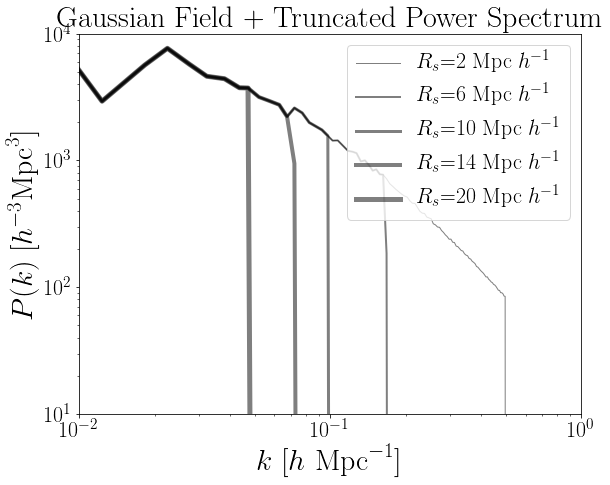

In [159]:
plt.figure(figsize=(9,7))

sigmas = [2.0, 6.0, 10.0, 14.0, 20.0]
for i, sigma in enumerate(sigmas):
    plt.loglog(pk['gauss_{:.1f}'.format(sigma)]['k'], 
               pk['gauss_{:.1f}'.format(sigma)]['Pk'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(sigma), 
              linewidth=i+1, color='black', alpha=0.5)


# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1E-2, 1.0)
plt.ylim(1E1,1E4)
plt.title("Gaussian Field + Truncated Power Spectrum")
plt.savefig("plot_power_spectrum_field_rs.pdf", bbox_inches='tight')

In [160]:
def corr_func(Pk, k):
    n_r = 1000
    r = np.linspace(0.1, 100.0, n_r)
    cf = np.zeros(n_r)
    for i in range(n_r):
        y = Pk[1:-1] * (k[1:-1]**2) * np.sin(k[1:-1]*r[i])/(k[1:-1]*r[i])
        x = k[1:-1]
        cf[i] = scipy.integrate.simps(y, x)
    cf = cf/(2.0*np.pi**2)
    
    i_min = np.argmin(np.abs(cf-cf[0]*0.5))
    half_r = r[i_min]
    #print(r[i_min])
    sigma_half_r = np.abs(r[i_min+1]-r[i_min-1])
    #sigma_half_r = 1.0
    print(cf[-1], cf[0], half_r)
    return {'cf':cf, 'r':r, 'half_r':half_r,'sigma_half_r':sigma_half_r}

In [161]:
cf = {}
for k in pk.keys():
    cf[k] = corr_func(pk[k]['Pk'], pk[k]['k'])

-1.1655212318068776e-05 0.01621937221518212 10.1
-7.830351064951772e-06 0.003809219442836154 19.900000000000002
3.4725084952438856e-06 0.0009096529790404982 34.800000000000004
2.0990338046253222e-05 0.00038524093360655406 43.50000000000001
2.677885564931367e-05 0.00020842841158031017 46.00000000000001
-0.00019573412339535433 0.4598092543731556 6.5
0.0003833475477074434 0.10071317779943913 17.3
0.0006309955583344261 0.0413949320119937 27.200000000000003
-0.0006478137555081394 0.020165451453170807 37.5
-0.00036068976296431675 0.009326594360057679 51.6


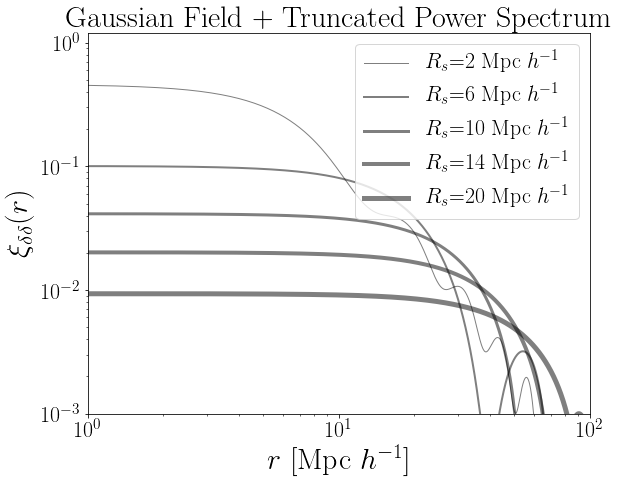

In [162]:
plt.figure(figsize=(9,7))

sigmas = [2.0, 6.0, 10.0, 14.0, 20.0]
for i,sigma in enumerate(sigmas):
    plt.loglog(cf['gauss_{:.1f}'.format(sigma)]['r'], 
               cf['gauss_{:.1f}'.format(sigma)]['cf'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(sigma), 
              linewidth=i+1, color='black', alpha=0.5)


# format the axes
plt.xlabel(r"$r$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.ylabel(r"$\xi_{\delta\delta}(r)$")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1.0, 1E2)
plt.ylim(1E-3,1.2E0)
plt.title("Gaussian Field + Truncated Power Spectrum")
plt.savefig("plot_corrfunc_field_rs.pdf", bbox_inches='tight')

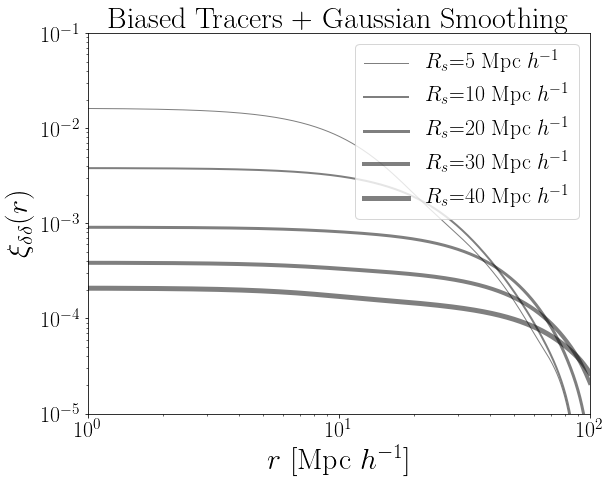

In [163]:
plt.figure(figsize=(9,7))

sigmas = [5.0, 10.0, 20.0, 30.0, 40.0]
for i, sigma in enumerate(sigmas):
    plt.loglog(cf['abacus_{:.1f}'.format(sigma)]['r'], 
               cf['abacus_{:.1f}'.format(sigma)]['cf'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(sigma),
               linewidth=i+1, color='black', alpha=0.5)

# format the axes
plt.xlabel(r"$r$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.ylabel(r"$\xi_{\delta\delta}(r)$")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1, 1E2)
plt.ylim(1E-5,1E-1)
plt.title("Biased Tracers + Gaussian Smoothing")
plt.savefig("plot_corrfunc_tracers_rs.pdf", bbox_inches='tight')

In [164]:
for k in cf.keys():
    print(k, cf[k]['half_r'], cf[k]['sigma_half_r'])

abacus_5.0 10.1 0.20000000000000107
abacus_10.0 19.900000000000002 0.1999999999999993
abacus_20.0 34.800000000000004 0.20000000000000284
abacus_30.0 43.50000000000001 0.19999999999999574
abacus_40.0 46.00000000000001 0.19999999999999574
gauss_2.0 6.5 0.1999999999999993
gauss_6.0 17.3 0.1999999999999993
gauss_10.0 27.200000000000003 0.20000000000000284
gauss_14.0 37.5 0.19999999999999574
gauss_20.0 51.6 0.19999999999999574


In [165]:
half_r_abacus = []
half_r_gauss = []
sigma_half_r_abacus = []
sigma_half_r_gauss = []

sigmas_gauss = np.array([2.0, 6.0, 10.0, 14.0, 20.0])
sigmas_abacus = np.array([5.0, 10.0, 20.0, 30.0, 40.0])

for sigma_gauss, sigma_abacus in zip(sigmas_gauss, sigmas_abacus):
    half_r_abacus.append(cf["abacus_{:.1f}".format(sigma_abacus)]["half_r"])
    half_r_gauss.append(cf["gauss_{:.1f}".format(sigma_gauss)]["half_r"])
    sigma_half_r_abacus.append(cf["abacus_{:.1f}".format(sigma_abacus)]["sigma_half_r"])
    sigma_half_r_gauss.append(cf["gauss_{:.1f}".format(sigma_gauss)]["sigma_half_r"])

    
half_r_abacus = np.array(half_r_abacus)
half_r_gauss = np.array(half_r_gauss)
sigma_half_r_abacus = np.array(sigma_half_r_abacus)
sigma_half_r_gauss = np.array(sigma_half_r_gauss)


In [166]:
A = np.array([sigmas_gauss, half_r_gauss])
np.savetxt("correlation_length_gauss.dat", A.T, fmt="%.1f",
           header='R_s R_dd')

A = np.array([sigmas_abacus, half_r_abacus])
np.savetxt("correlation_length_abacus.dat", A.T, fmt="%.1f",
           header='R_s R_dd')

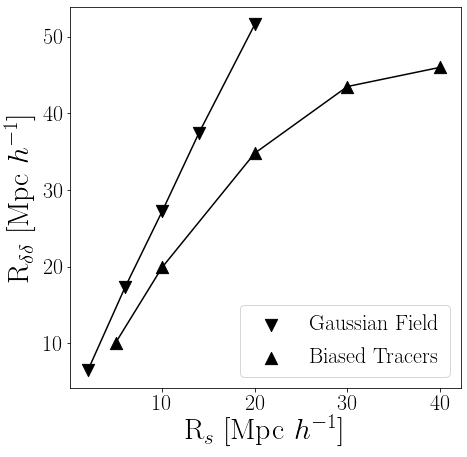

In [167]:
plt.figure(figsize=(7,7))

plt.scatter(sigmas_gauss, half_r_gauss, marker="v", s=150, label="Gaussian Field", color='black')
plt.plot(sigmas_gauss, half_r_gauss, color='black')
#plt.errorbar(sigma_vals, half_r_mock, yerr=sigma_half_r_mock, color='black', capsize=10)


plt.scatter(sigmas_abacus, half_r_abacus, marker="^", s=150, label="Biased Tracers", color='black')
plt.plot(sigmas_abacus, half_r_abacus, color='black')
#plt.errorbar(sigma_vals, half_r_sim, yerr=sigma_half_r_sim, color='black', capsize=10)


#plt.plot(sigma_vals, 3*sigma_vals, color='black', label='$R_{\delta\delta}=3R_{s}$', alpha=0.4)

#plt.semilogy()
#plt.xlim(0,22)
#plt.ylim(0,32)
plt.legend(fontsize=SMALL_SIZE)
plt.xlabel(r"R$_s$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.ylabel(r"R$_{\delta\delta}$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.savefig("correlation_length.pdf", bbox_inches='tight')

In [168]:
#https://cluster-toolkit.readthedocs.io/en/latest/source/correlation_functions.html

In [48]:
720/60

12.0